<a href="https://colab.research.google.com/github/NaimiMariem/QR_JP_Morgan_Chase/blob/main/task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# Ce texte est au format code
```
<div>
  <h1 style="font-size: 24px; font-weight: bold;">Investigate and analyze price data</h1>
  <p>
    Commodity storage trading involves the buying and selling of commodity contracts that are associated with physical goods, such as natural gas, oil, agricultural products, etc. These contracts typically specify the future delivery of the commodity at a predetermined price. One significant aspect of commodity storage trading is estimating the future price of the commodity, which is essential for making informed trading decisions and managing risks.
  </p>
  <h2 style="font-size: 20px; font-weight: bold;">Task Description</h2>
  <p>
    In this virtual experience with JP Morgan Chase & Co., we are tasked with analyzing and estimating the purchase price of natural gas for commodity storage contracts. The data we have access to is obtained from a market data provider, representing the market price of natural gas delivered at the end of each calendar month. The data covers a period from 31st October 2020 to 30th September 2024.
  </p>
  <h3 style="font-size: 18px; font-weight: bold;">Methodology</h3>
  <ol>
    <li><strong>Data Acquisition</strong>: We will download the monthly natural gas price data from the provided CSV file. This data will serve as the foundation for our analysis.</li>
    <li><strong>Data Analysis and Visualization</strong>: We will visualize the data to gain insights into the price trends over time. This step is crucial for identifying patterns, seasonal trends, and potential factors that might influence the price of natural gas.</li>
    <li><strong>Estimating Past and Future Prices</strong>: Using the acquired data, we will create a method to estimate the purchase price of natural gas at any date in the past and extrapolate it for one year into the future. We will use linear interpolation to estimate prices for dates present in the dataset and not present in the dataset.</li>
    <li><strong>Additional Analysis</strong>: Further analysis and exploratory data analysis (EDA) techniques can be employed to discover more complex patterns and factors affecting gas prices. Machine learning models may be considered to improve the accuracy of the price estimates.</li>
  </ol>


In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.arima.model import ARIMA


In [69]:
#Data extraction
raw_url="https://raw.githubusercontent.com/NaimiMariem/QR_JP_Morgan_Chase/main/Nat_Gas.csv"
Gaz_price_data = pd.read_csv(raw_url)
Gaz_price_data['Dates'] = pd.to_datetime(Gaz_price_data['Dates'])
Gaz_price_data.set_index('Dates', inplace=True)
#Gaz_price_data=pd.read_csv(raw_url, parse_dates=[0], index_col=[0])
Gaz_price_data.head()



,Prices
Dates,
2020-10-31,10.1
2020-11-30,10.3
2020-12-31,11.0
2021-01-31,10.9
2021-02-28,10.9


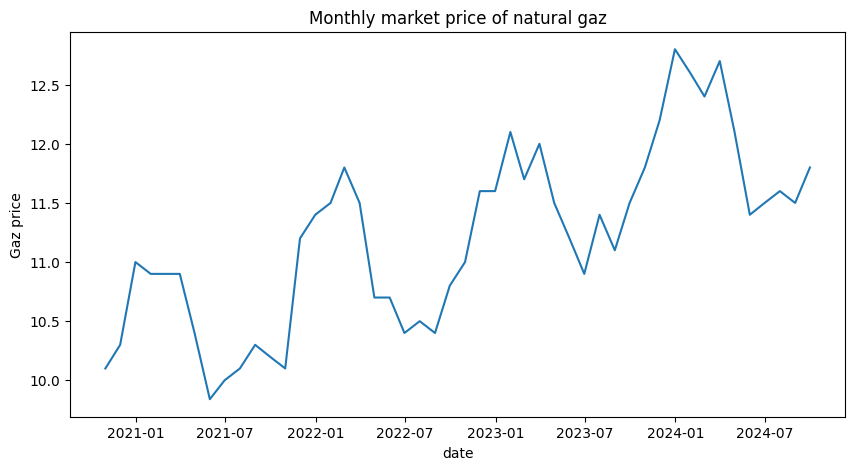

In [70]:
#Data visualization
plt.figure(figsize=(10,5))
plt.plot(Gaz_price_data)
plt.xlabel("date")
plt.ylabel("Gaz price")
plt.title("Monthly market price of natural gaz")
plt.show()

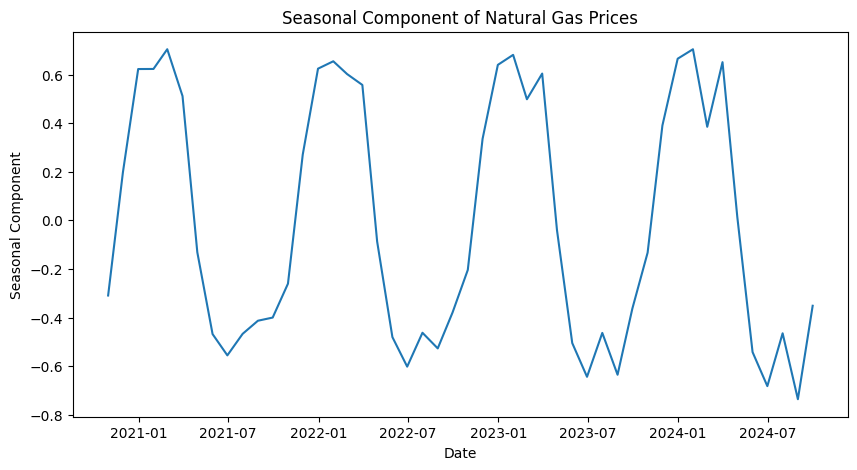

In [71]:
stl = STL(Gaz_price_data['Prices'], seasonal=13)  # The seasonal parameter is set to 13 for monthly data
result = stl.fit()
seasonal, trend, resid = result.seasonal, result.trend, result.resid

#Visualize the seasonal component
plt.figure(figsize=(10, 5))
plt.plot(seasonal)
plt.xlabel('Date')
plt.ylabel('Seasonal Component')
plt.title('Seasonal Component of Natural Gas Prices')
plt.show()



```
# Ce texte est au format code
```
<p> The seasonal component has a quasi-periodic pattern with a rise every year arround january This suggests that there is a seasonal effect on the gaz price, and that prices tend to exhibit a specific behavior arround winter. Which can be interpreted as higher demand due to heating needs during that season
</p>



```
# Ce texte est au format code
```
<h3> Data estimation - ARIMA Model </h3>
<p> In order to get an estimation of the gaz price in any date in the past and to extrapolate the data to get a forecast, we can use the ARIMA Model.
The ARIMA model captures the autoregressive component ( which models the relationship between data points and their lagged values), and the moving average component ( which models the relationship between data points and their lagged forecast errors)


In [73]:
#Fitting the ARIMA model
model = ARIMA(Gaz_price_data, order=(1, 1, 1))  # (p, d, q) order
model_fit = model.fit()

#Estimate prices for a given date and extrapolate for one year
def estimate_price(date):

    forecast = model_fit.forecast(steps=12)
    price = forecast.loc[date]
    return price

# Example usage
date_to_estimate = pd.to_datetime('2024-12-31')
estimated_price = estimate_price(date_to_estimate)
print(f"Estimated price on {date_to_estimate.date()}: {estimated_price:.2f}")

Estimated price on 2024-12-31: 11.84


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
